# Are linguistic characteristics enough to predict a writer?
The goal of this project is to uncover and visualize different writing styles and figure out if linguistic characteristics of different passages are enough when predicting an author.

## Index of the Project
1. Text Features Extractions
2. EDA
3. Model Testing
4. Conclusions and future enhancements

## Text Features Extractions

In [39]:
#Read Files
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.stem import PorterStemmer
from nltk import sent_tokenize, word_tokenize


# Helper function to read data from a labeled directory
def read_data_from_directory(directory_path):
    authors = os.listdir(directory_path)
    texts = []
    labels = []
    for author in authors:
        author_path = os.path.join(directory_path, author)
        for file_name in os.listdir(author_path):
            file_path = os.path.join(author_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as f:
                texts.append(f.read())
                labels.append(author)
    return texts, labels

# Reading the training and test data
train_texts, train_labels = read_data_from_directory("/Users/Nicolas/Desktop/MAESTRIA/Summer/Intro ML/Takehome_Scott/STA380-master/data/ReutersC50/C50train")
test_texts, test_labels = read_data_from_directory("/Users/Nicolas/Desktop/MAESTRIA/Summer/Intro ML/Takehome_Scott/STA380-master/data/ReutersC50/C50test")

### 1. Text Feature extraction

In [40]:
import pandas as pd
from nltk.probability import FreqDist
import numpy as np

#Feature extraction
def extract_features(text):
    #Tokenize sentences and words
    sentences = sent_tokenize(text)
    words = word_tokenize(text.lower())
    
    #Remove stop words and punctuation
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and word not in string.punctuation]
    
    #Average sentence length
    avg_sentence_length = np.mean([len(sent.split()) for sent in sentences])
    
    #Diversity in vocabulary
    unique_words = set(words)
    vocab_diversity = len(unique_words) / len(words)
    
    #POS (Phigures of Speech) Tagging
    pos_tags = nltk.pos_tag(words)
    pos_counts = FreqDist(tag for (word, tag) in pos_tags)
    
    return {
        'avg_sentence_length': avg_sentence_length,
        'vocab_diversity': vocab_diversity,
        'noun_freq': pos_counts['NN'],  # Frequency of nouns
        'verb_freq': pos_counts['VB'],  # Frequency of verbs
        'adj_freq': pos_counts['JJ'],   # Frequency of adjectives
        'adv_freq': pos_counts['RB'],   # Frequency of adverbs
        'pre_freq': pos_counts['IN'],   # Frequency of prepositions
    }


In [41]:
# Extracting features for all texts and creating new DF
features = [extract_features(text) for text in train_texts]
train_features_df = pd.DataFrame(features)
train_features_df['author'] = train_labels
train_features_df.head()

,avg_sentence_length,vocab_diversity,noun_freq,verb_freq,adj_freq,adv_freq,pre_freq,author
0,21.212121,0.594203,166,6,86,15,12,RobinSidel
1,18.055556,0.608108,155,6,64,17,4,RobinSidel
2,19.105263,0.688525,90,7,40,17,4,RobinSidel
3,25.761905,0.600000,131,11,58,13,6,RobinSidel
4,23.608696,0.591716,132,7,44,11,7,RobinSidel


In [42]:
# Same as above but for test
features = [extract_features(text) for text in test_texts]
test_features_df = pd.DataFrame(features)
#train_features_df['author'] = train_labels
test_features_df.head()

,avg_sentence_length,vocab_diversity,noun_freq,verb_freq,adj_freq,adv_freq,pre_freq
0,22.315789,0.651246,108,16,29,11,5
1,21.812500,0.527950,184,15,79,13,9
2,24.904762,0.641618,103,2,60,14,3
3,21.434783,0.687500,100,2,50,14,5
4,18.760000,0.697068,114,5,61,16,3


## EDA

In [43]:
#Overview of the Data
print(train_features_df.shape)
print(train_features_df.info())

(2500, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   avg_sentence_length  2500 non-null   float64
 1   vocab_diversity      2500 non-null   float64
 2   noun_freq            2500 non-null   int64  
 3   verb_freq            2500 non-null   int64  
 4   adj_freq             2500 non-null   int64  
 5   adv_freq             2500 non-null   int64  
 6   pre_freq             2500 non-null   int64  
 7   author               2500 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 156.4+ KB
None


In [44]:
#Descriptive Statistics
print(train_features_df.describe())

       avg_sentence_length  vocab_diversity    noun_freq    verb_freq  \
count          2500.000000      2500.000000  2500.000000  2500.000000   
mean             23.703606         0.651791   106.516400     6.122800   
std               3.437567         0.059710    30.807177     3.895971   
min              12.622642         0.467172    11.000000     0.000000   
25%              21.457386         0.612669    87.000000     3.000000   
50%              23.583333         0.647059   105.000000     5.000000   
75%              25.752976         0.684612   123.000000     8.000000   
max              48.142857         0.965517   286.000000    23.000000   

          adj_freq     adv_freq     pre_freq  
count  2500.000000  2500.000000  2500.000000  
mean     55.910800    12.496800     4.408800  
std      17.920315     5.657879     2.649621  
min       4.000000     0.000000     0.000000  
25%      45.000000     9.000000     2.000000  
50%      55.000000    12.000000     4.000000  
75%      66.0

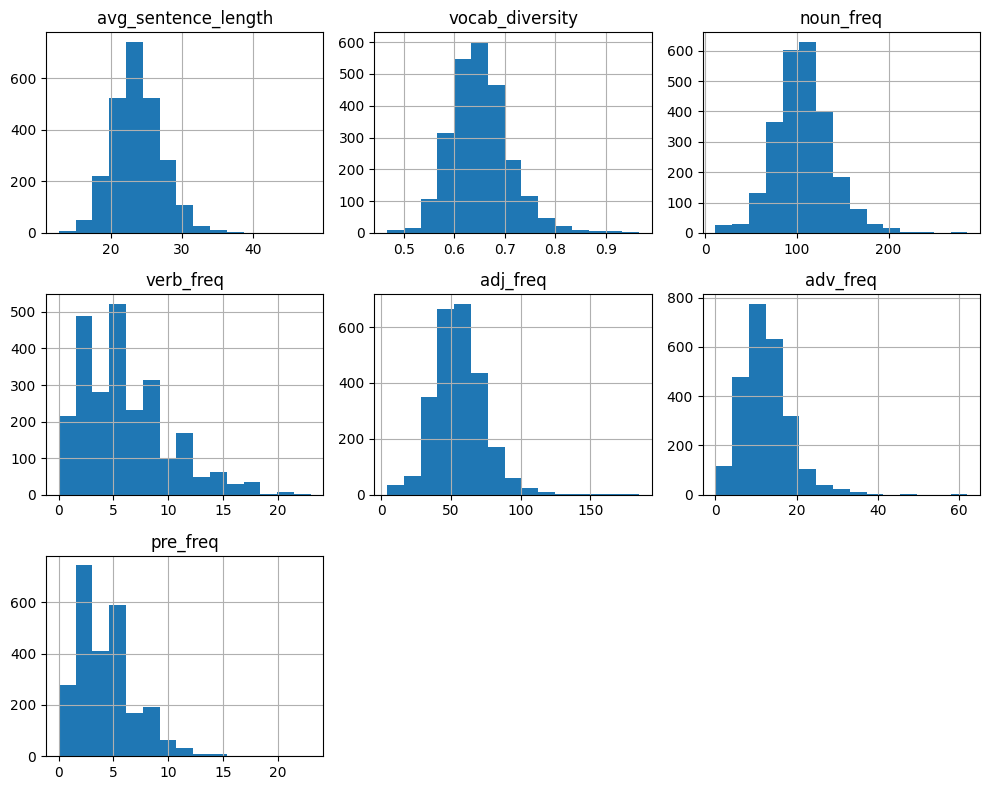

In [45]:
import matplotlib.pyplot as plt
#Numerical Analysis
train_features_df.hist(figsize=(10, 8), bins=15)
plt.tight_layout()
plt.show()


* The distributions of these features are quite varied, with some being relatively normal (e.g., vocab_diversity), while others show significant skewness or multimodal distributions (e.g., verb_freq, pre_freq).
* The right-skewed features (e.g., avg_sentence_length, noun_freq, adv_freq) suggest that while most authors fall within a certain range, there are outliers with much higher values.
* The multimodal distributions suggest that there may be different subgroups within your dataset, potentially corresponding to different writing styles, genres, or groups of authors.

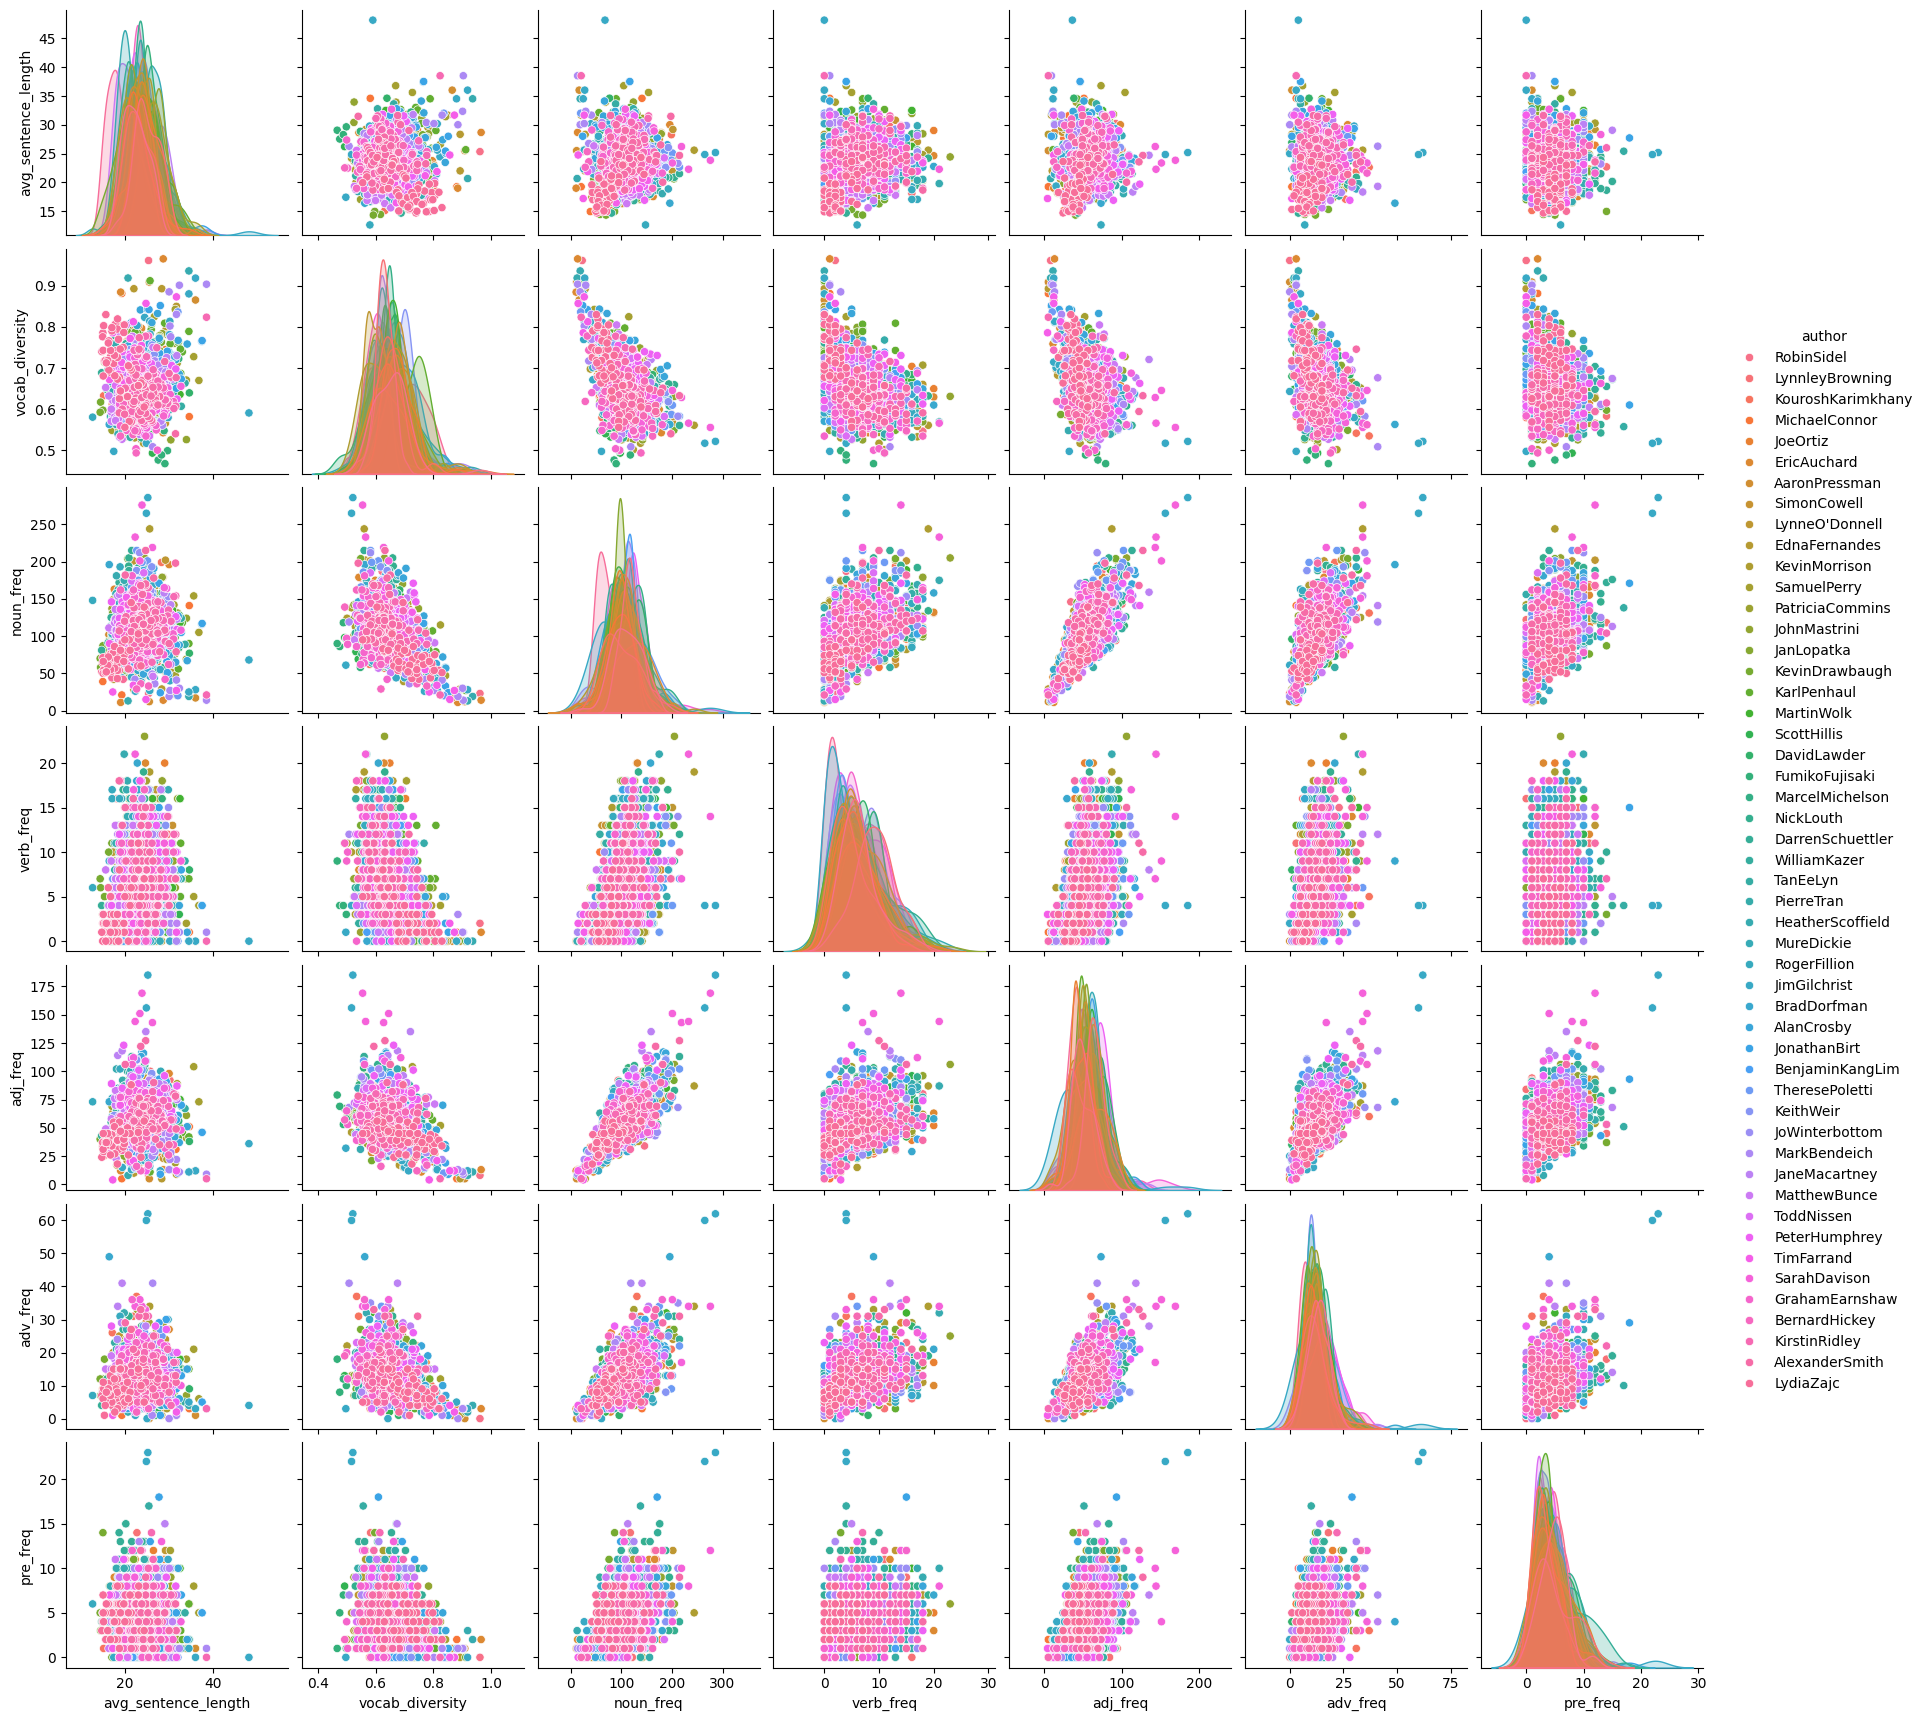

In [46]:
import seaborn as sns
#Pairplot
sns.pairplot(train_features_df, hue='author')
plt.show()

### Off-Diagonal Plots (Scatter Plots):
* There seems to be a positive correlation between noun_freq and verb_freq, adj_freq, and adv_freq, suggesting that authors who use more nouns also tend to use more verbs, adjectives, and adverbs.
* A similar pattern is observed between adj_freq and adv_freq, indicating a tendency for authors to use more adjectives alongside more adverbs.
* In the scatter plots of noun_freq vs. adj_freq, and verb_freq vs. adj_freq, some authors appear to be grouped in specific regions of the plot.
* Certain authors appear to have a unique signature, particularly in noun_freq and verb_freq, which could be useful for classification.
### Diagonal Plots
* The distributions for most features are relatively consistent across authors, but there are variations that might help in distinguishing different authors.
* Some features, like noun_freq and verb_freq, show more pronounced variations across authors compared to others like avg_sentence_length and vocab_diversity.

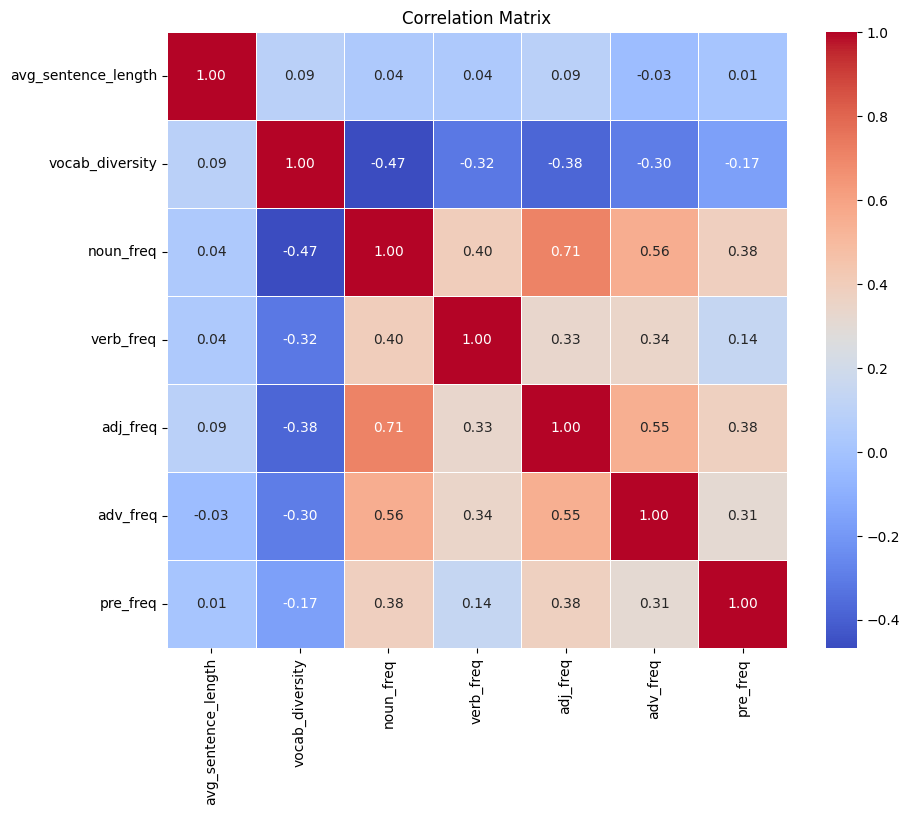

In [47]:
correlation_matrix = train_features_df.drop(['author'], axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### High Correlations:
* noun_freq vs. adj_freq (0.71): This is the highest positive correlation in the matrix. It suggests that as the frequency of nouns increases, the frequency of adjectives also tends to increase. This makes sense, as descriptive writing often uses more adjectives alongside nouns.
* noun_freq vs. adv_freq (0.56): This is another strong positive correlation, indicating that authors who use more nouns also tend to use more adverbs.
* adj_freq vs. adv_freq (0.55): This correlation suggests that authors who use more adjectives also use more adverbs, which might indicate a more descriptive or elaborate writing style.

### Low to Negative Correlations:
* vocab_diversity vs. noun_freq (-0.47), verb_freq (-0.32), adj_freq (-0.38), adv_freq (-0.30): Vocabulary diversity shows a negative correlation with most frequency measures, indicating that as the use of specific parts of speech increases, the overall vocabulary diversity might decrease. This could be because frequent use of certain parts of speech might lead to repetitive word usage.
* avg_sentence_length shows weak correlations with all other features. The highest correlation it has is with adj_freq (0.09), which is still very weak. This suggests that sentence length may not be strongly related to the frequency of specific parts of speech or vocabulary diversity in this dataset.

## Predict author based on linguistic characteristics

### Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = train_features_df.drop(['author'], axis=1)
y = train_features_df['author']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

    AaronPressman       0.10      0.14      0.12        14
       AlanCrosby       0.32      0.47      0.38        15
   AlexanderSmith       0.11      0.07      0.09        14
  BenjaminKangLim       0.10      0.07      0.08        15
    BernardHickey       0.22      0.29      0.25        14
      BradDorfman       0.18      0.11      0.14        18
 DarrenSchuettler       0.19      0.33      0.24         9
      DavidLawder       0.20      0.33      0.25        12
    EdnaFernandes       0.24      0.24      0.24        17
      EricAuchard       0.38      0.14      0.21        21
   FumikoFujisaki       0.17      0.21      0.19        14
   GrahamEarnshaw       0.24      0.29      0.26        17
 HeatherScoffield       0.12      0.13      0.12        15
       JanLopatka       0.12      0.22      0.16         9
    JaneMacartney       0.21      0.15      0.18        20
     JimGilchrist       0.35      0.42      0.38       

In [49]:
# Cross Validate Random Forest for optimal number of trees and of nodes
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best score:  0.18571428571428572


In [50]:
# Test the model with the optimal parameters
rf = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'], min_samples_split=grid_search.best_params_['min_samples_split'], random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

    AaronPressman       0.09      0.14      0.11        14
       AlanCrosby       0.37      0.47      0.41        15
   AlexanderSmith       0.14      0.07      0.10        14
  BenjaminKangLim       0.09      0.07      0.08        15
    BernardHickey       0.28      0.36      0.31        14
      BradDorfman       0.22      0.11      0.15        18
 DarrenSchuettler       0.22      0.44      0.30         9
      DavidLawder       0.20      0.33      0.25        12
    EdnaFernandes       0.29      0.24      0.26        17
      EricAuchard       0.33      0.10      0.15        21
   FumikoFujisaki       0.13      0.14      0.14        14
   GrahamEarnshaw       0.25      0.29      0.27        17
 HeatherScoffield       0.07      0.07      0.07        15
       JanLopatka       0.12      0.22      0.16         9
    JaneMacartney       0.20      0.15      0.17        20
     JimGilchrist       0.36      0.42      0.39       

In [51]:
# Now test the tuned model on test set
test_features_df['author'] = test_labels
y_pred = rf.predict(test_features_df.drop(['author'], axis=1))
print(classification_report(test_labels, y_pred))

                   precision    recall  f1-score   support

    AaronPressman       0.05      0.06      0.06        50
       AlanCrosby       0.16      0.14      0.15        50
   AlexanderSmith       0.04      0.04      0.04        50
  BenjaminKangLim       0.07      0.06      0.06        50
    BernardHickey       0.09      0.10      0.09        50
      BradDorfman       0.03      0.02      0.02        50
 DarrenSchuettler       0.12      0.12      0.12        50
      DavidLawder       0.03      0.06      0.04        50
    EdnaFernandes       0.06      0.06      0.06        50
      EricAuchard       0.15      0.08      0.10        50
   FumikoFujisaki       0.08      0.08      0.08        50
   GrahamEarnshaw       0.12      0.18      0.15        50
 HeatherScoffield       0.06      0.08      0.07        50
       JanLopatka       0.00      0.00      0.00        50
    JaneMacartney       0.08      0.08      0.08        50
     JimGilchrist       0.29      0.42      0.34       

In [52]:
#Real value vs Predicted
test_features_df['predicted_author'] = y_pred
test_features_df.tail(20)

,avg_sentence_length,vocab_diversity,noun_freq,verb_freq,adj_freq,adv_freq,pre_freq,author,predicted_author
2480,19.470588,0.776423,72,2,45,5,2,LydiaZajc,LydiaZajc
2481,19.250000,0.627273,56,1,40,5,5,LydiaZajc,LydiaZajc
2482,21.421053,0.674121,86,2,51,9,7,LydiaZajc,LydiaZajc
2483,16.181818,0.685950,85,3,44,12,2,LydiaZajc,KevinDrawbaugh
2484,17.000000,0.758621,62,0,38,5,3,LydiaZajc,LydiaZajc
2485,17.157895,0.758065,67,4,38,9,6,LydiaZajc,LydiaZajc
2486,19.500000,0.797468,62,0,44,8,5,LydiaZajc,LydiaZajc
2487,18.588235,0.784000,72,1,29,6,4,LydiaZajc,LydiaZajc
2488,17.882353,0.766520,58,1,31,6,7,LydiaZajc,LydiaZajc
2489,17.214286,0.777778,48,5,27,2,4,LydiaZajc,LydiaZajc


Notice how for this model, linguistic characteristics is just not enough to predict the author. A lot of authors share linguistic characteristics that are not allowing out Random Forest to learn properly. There are very few cases such as author Lydia Zajc who are being predicted somewhat right.

### XGBoost Model

In [53]:
#Build the XGBoost Model
import xgboost as xgbt
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns

label_encoder = LabelEncoder()

X = train_features_df.drop(['author'], axis=1)
y = train_features_df['author']
#XGBoost requires Y to be numeric
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [54]:
#Convert the dataset into DMatrix
dtrain = xgbt.DMatrix(X_train, label=y_train)
dtest = xgbt.DMatrix(X_test, label=y_test)

In [55]:
#Train the model
params = {
    'objective': 'multi:softmax', # Specify multiclass classification
    'num_class': 50,  # number of classes in the target variable
    'learning_rate': 0.001, # learning rate for the model
    'max_depth': 10  # maximum depth of the tree
}

# Train the model
num_rounds = 100
model = xgbt.train(params, dtrain, num_rounds)

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Make predictions
y_pred = model.predict(dtest)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.114
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 3 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 1 1 0]
 [0 1 0 ... 0 0 0]]


<Axes: >

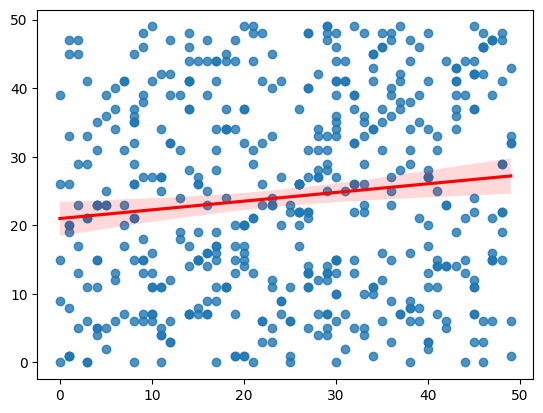

In [57]:
sns.regplot(x=y_test, y=y_pred, line_kws={'color': 'red'})

Notice how predictions are still all scattered around. Thus, our model is still not good at predicting based on linguistic characteristics

In [58]:
#Cross Validate XGBoost for optimal number of trees and of nodes
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

#Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [ 5, 10, 15],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Initialize the Random Forest classifier
xgb = XGBClassifier(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(xgb, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50}
Best score:  0.173


In [59]:
# Implement best parameters for XGBoost in test_features_df
Xfin = test_features_df.drop(['author', 'predicted_author'], axis=1)
yfin = test_features_df['author']
#Factor Y variable
yfin = label_encoder.fit_transform(yfin)

# Convert the dataset into DMatrix
dmat = xgbt.DMatrix(Xfin, label=yfin)

In [60]:
params = { 
    'objective': 'multi:softmax',
    'num_class': 50, 
    'learning_rate': 0.1, 
    'max_depth': 10,
    'n_estimators': 50
}

# Train the model
model = xgbt.train(params, dtrain, 100)

# Make predictions with optimal parameters
y_pred = model.predict(dmat)

# Evaluate the model
accuracy = accuracy_score(yfin, y_pred)
cm = confusion_matrix(yfin, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(cm)

/Users/Nicolas/Desktop/MAESTRIA/Summer/Intro ML/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:45:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.0848
Confusion Matrix:
[[1 0 2 ... 1 2 0]
 [1 6 1 ... 0 0 1]
 [3 1 1 ... 0 2 0]
 ...
 [2 0 0 ... 4 1 0]
 [2 0 0 ... 4 3 1]
 [2 1 0 ... 0 0 1]]


<Axes: >

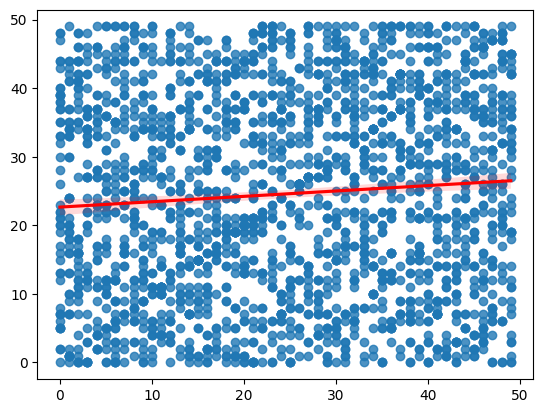

In [61]:
sns.regplot(x=yfin, y=y_pred, line_kws={'color': 'red'})

### Key Observations:
* The wide scattering and lack of a tight cluster around the line indicate that the model might not be capturing the underlying pattern effectively.
* The spread around the red line suggests that there might be a considerable error in the model’s predictions.

### KNN

In [62]:
#Build the KNN Model
from sklearn.neighbors import KNeighborsClassifier

X = train_features_df.drop(['author'], axis=1)
y = train_features_df['author']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(cm)


Accuracy: 0.102
Confusion Matrix:
[[2 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [1 0 1 ... 0 1 0]
 ...
 [3 0 0 ... 0 0 0]
 [0 1 0 ... 1 1 0]
 [0 0 0 ... 0 0 0]]


In [63]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initialize the Random Forest classifier
knn = KNeighborsClassifier()

# Initialize the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Best score:  0.1355


In [64]:
# Drop author and predicted_author from test_features_df
X_test_features = test_features_df.drop(['author', 'predicted_author'], axis=1)

In [65]:
# Use the best parameters found from grid search
knn = KNeighborsClassifier(
    n_neighbors=grid_search.best_params_['n_neighbors'],
    weights=grid_search.best_params_['weights'],
    algorithm=grid_search.best_params_['algorithm']
)
knn.fit(X_train, y_train)

# Predict on the test set features
y_pred = knn.predict(X_test_features)

# Assuming test_labels corresponds to y_test
accuracy = accuracy_score(test_labels, y_pred)
cm = confusion_matrix(test_labels, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.058
Confusion Matrix:
[[4 2 0 ... 0 1 2]
 [0 2 2 ... 0 0 1]
 [0 0 0 ... 2 0 0]
 ...
 [1 1 0 ... 3 0 2]
 [0 0 1 ... 4 0 1]
 [0 2 1 ... 3 0 1]]


In [76]:
y_pred_encoded = label_encoder.fit_transform(y_pred)
y_test_actual = label_encoder.fit_transform(test_features_df['author'])

<Axes: >

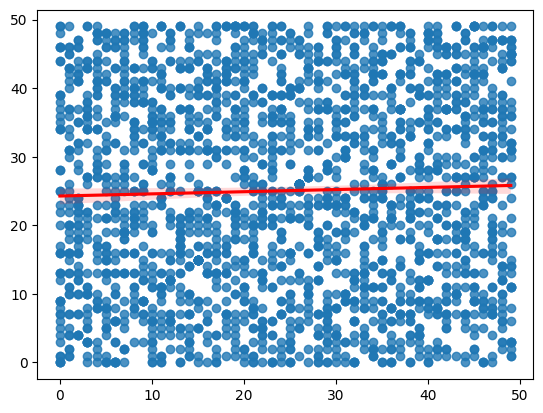

In [77]:
# Scatter Plot
sns.regplot(x=y_test_actual, y=y_pred_encoded, line_kws={'color': 'red'})

### Key Observations:
* Flat Line: The nearly flat slope of the red line implies that changes in the predicted values do not correspond well to changes in the actual values, which could be a sign of poor model performance.
* Random Distribution: The random scatter and lack of a strong trend suggest that the model may not be effective, potentially requiring adjustments such as model tuning or exploring different features or models.

## Conclusions and Further Enhancements